<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW11_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 3.7 - Neural Networks.

The activation function dictates the firing of neurons by calculating the weighted sum and further adding bias to it. The activation function introduces non-linearity to a neuron's output. A common activation function is the hyperbolic tan function.

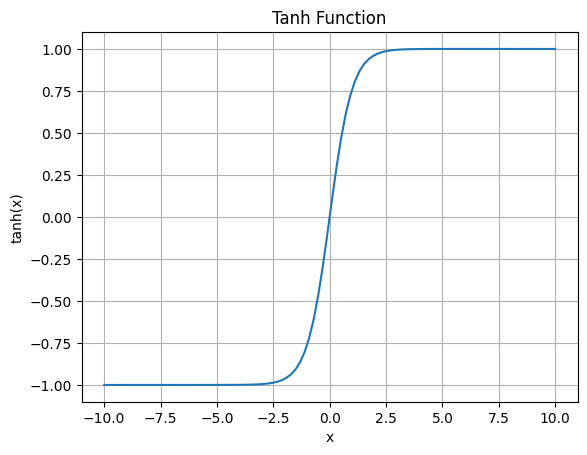

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MAT 422 - Ivan Matyushov

# Section 3.7.2 - Activation Functions
x = np.linspace(-10, 10, 100)

# Compute tanh values
y = np.tanh(x)

# Plot the function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Function')
plt.grid(True)
plt.show()


The Cost Function is a function used to find the mean square error between predicted and actual values of your model. This a function good for predicting the error of your model.

In [3]:
# Section 3.7.3 - Cost Function

def mse(y_true, y_pred): # One can write a basic cost function script like so.
    return np.mean((y_true - y_pred)**2)

y_t = np.array([1, 2, 3])
y_p = np.array([1.2, 1.8, 3.5])

cost = mse(y_t, y_p)
print("MSE:", cost)



MSE: 0.10999999999999999


Here I took the same code and dataset from the previous homework and had it predict the calories burned based on the three columns of medication usage, sleep quality, and steps taken. The mean square error is quite large as the calorie differences are still large and get squared so the error gets skewed quite largely.

In [5]:
# From previous homework's AI model developped, this same function could be ran
# if we break training and testing into 50% of data

import math
df1 = pd.read_csv('Health_Sleep_Statistics.csv')
new_df = df1.loc[:, ['Steps', 'Sleep', 'Calories', 'Medication']]
nrows = math.floor(new_df.shape[0] * 0.5) #partition data to train on 50% of data points

training = new_df.loc[:nrows]
test = new_df.loc[nrows:]
cals_array = training['Calories'].to_numpy()

print(cals_array)

from sklearn.svm import SVC
model = SVC()
model.fit(training[["Steps", "Sleep", "Medication"]], training["Calories"])

predict = model.predict(test[["Steps", "Sleep", "Medication"]]) #predict models from rest of data set

print(predict)

accu = sum(test["Calories"] == predict) / test.shape[0] #compares accuracy of predictions

print(cals_array[0:50]-predict)
mean_error = np.mean((cals_array[0:50]-predict) ** 2)
print(mean_error)


[2500 2200 2700 2100 2800 2300 2600 2000 2750 2400 2100 2900 2400 2000
 2700 2300 2500 2100 2800 2400 2600 2100 2750 2300 2600 2000 2800 2400
 2500 2100 2900 2200 2600 2000 2750 2300 2500 2100 2900 2200 2600 2000
 2750 2300 2500 2100 2900 2200 2600 2000 2700]
[2600 2100 2600 2100 2600 2300 2600 2100 2600 2100 2600 2100 2600 2300
 2600 2100 2600 2100 2600 2100 2600 2300 2600 2100 2600 2100 2600 2100
 2600 2300 2600 2100 2600 2100 2600 2100 2600 2300 2600 2100 2600 2100
 2600 2100 2600 2300 2600 2100 2600 2100]
[-100  100  100    0  200    0    0 -100  150  300 -500  800 -200 -300
  100  200 -100    0  200  300    0 -200  150  200    0 -100  200  300
 -100 -200  300  100    0 -100  150  200 -100 -200  300  100    0 -100
  150  200 -100 -200  300  100    0 -100]
45000.0


This algorithm has two main stages: forward propagation and backpropagation. Forward propagation is where the model makes the predictions and outputs results. Backpropagation refers to the alogirthm going back on the output, checking the error and adjusting the model for the next stage of forward propagation.

Backpropagation is necessary for training neural networks. Backpropagation calculates the gradient of the error with respect to the weights of the network. Based on minimizing the error, the model updates the parameters to adjust it and try to improve upon its results. As more iterations take place, the model becomes more accurate. A sigmoid function is used as the activation function for the 'neurons.' The derivative of the sigmoid is used in the gradient of the error. New predictions are made with each iteration.

In [12]:
# Section 3.7.4 - Backpropagation

def sigmoid(x): # Activation function
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

# Weights for algorithm
np.random.seed(1)
weight_in = 1.5 * np.random.random((2, 3)) - 1
weight_out = 1.5 * np.random.random((3, 1)) - 1

# Data to train on:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) #XOR gate array - only true when one input is true
y = np.array([[0], [1], [1], [0]])

step = 0.1 # Step size

# Training loop
n = 10000
for i in range(n):

    # Forward propagation
    hl_input = np.dot(x, weight_in)
    hl_output = sigmoid(hl_input)
    output = sigmoid(np.dot(hl_output, weight_out))

    # Backpropagation
    error = y - output
    deriv_predicted = error * sigmoid_deriv(output)
    error_hl = deriv_predicted.dot(weight_out.T)
    deriv_hl = error_hl * sigmoid_deriv(hl_output)

    # Update weights
    weight_out += hl_output.T.dot(deriv_predicted) * step
    weight_in += x.T.dot(deriv_hl) * step

# Test the network
print("Output from neural network after 10000 runs: ")
print(output)

Output from neural network after 10000 runs: 
[[0.08937828]
 [0.91244685]
 [0.91323346]
 [0.51122461]]


The output is close to predicting that the 2nd and 3rd outputs should be close to one after 10000 iterations. The first input is close to 0. As the number of runs increases, the 2nd and 3rd outputs get closer to 1 and the first gets closer to 0. The 4th input converges to 0.5 where the model has more trouble.